In [1]:
import pandas as pd
import numpy as np

file_path = "Data_AffectedArea.csv"
df = pd.read_csv(file_path)
print(df.shape)
df.head()

(517, 13)


,X,Y,month,day,A,B,C,D,temp,RH,wind,rain,area
0,7,5.0,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4.0,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4.0,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6.0,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6.0,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


In [2]:
df.drop_duplicates(inplace = True)
print("After droping duplicates the shape of DataFrame is "+ str(df.shape))
print(df.isnull().sum())
mask = df.isnull()
null_value_rows = df[mask.any(axis=1)]
null_value_rows

After droping duplicates the shape of DataFrame is (514, 13)
X        0
Y        2
month    0
day      0
A        2
B        0
C        0
D        0
temp     0
RH       1
wind     0
rain     0
area     0
dtype: int64


,X,Y,month,day,A,B,C,D,temp,RH,wind,rain,area
11,7,5.0,15,sat,NaN,73.2,713.0,22.6,19.3,38.0,4.0,0.0,0.0
13,6,NaN,sep,mon,90.9,126.5,686.5,7.0,21.3,42.0,2.2,0.0,0.0
53,4,3.0,aug,wed,NaN,111.2,654.1,9.6,20.4,42.0,4.9,0.0,0.0
130,4,NaN,feb,sat,68.2,21.5,87.2,0.8,15.4,40.0,2.7,0.0,0.0
491,4,4.0,aug,thu,95.8,152.0,624.1,13.8,32.4,NaN,4.5,0.0,0.0


In [3]:
df.dropna(inplace=True)
print("After droping null values the shape of DataFrame is "+ str(df.shape))

After droping null values the shape of DataFrame is (509, 13)


In [4]:
'''
creating a function to check for upper and lower bound values of the data columns 
and removing the rows that doesn't fall within these boundaries
''' 

def upperLowerBound_CheckAndDrop(df, Column, lower_bound, upper_bound):
    print("shape of the DataFrame before removing the column "+Column+ " is"+ str(df.shape))
    filtered_df = df[(df[Column] < lower_bound) | (df[Column] > upper_bound)]
    df.drop(filtered_df.index, inplace=True)
    print("shape of the DataFrame after removing the column "+Column+ " is"+ str(df.shape))

upperLowerBound_CheckAndDrop(df, 'X', 1, 9)
upperLowerBound_CheckAndDrop(df, 'Y', 2, 9)
upperLowerBound_CheckAndDrop(df, 'A', 18.7, 96.20)
upperLowerBound_CheckAndDrop(df, 'B', 1.1, 291.3)
upperLowerBound_CheckAndDrop(df, 'C', 7.9, 860.6)
upperLowerBound_CheckAndDrop(df, 'D', 0.0, 56.10)
upperLowerBound_CheckAndDrop(df, 'temp', 2.2, 33.30)
upperLowerBound_CheckAndDrop(df, 'RH', 15.0, 100)
upperLowerBound_CheckAndDrop(df, 'wind', 0.40, 9.40)
upperLowerBound_CheckAndDrop(df, 'rain', 0.0, 6.4)
upperLowerBound_CheckAndDrop(df, 'area', 0.00, 1090.84)
df

shape of the DataFrame before removing the column X is(509, 13)
shape of the DataFrame after removing the column X is(507, 13)
shape of the DataFrame before removing the column Y is(507, 13)
shape of the DataFrame after removing the column Y is(507, 13)
shape of the DataFrame before removing the column A is(507, 13)
shape of the DataFrame after removing the column A is(504, 13)
shape of the DataFrame before removing the column B is(504, 13)
shape of the DataFrame after removing the column B is(504, 13)
shape of the DataFrame before removing the column C is(504, 13)
shape of the DataFrame after removing the column C is(504, 13)
shape of the DataFrame before removing the column D is(504, 13)
shape of the DataFrame after removing the column D is(504, 13)
shape of the DataFrame before removing the column temp is(504, 13)
shape of the DataFrame after removing the column temp is(504, 13)
shape of the DataFrame before removing the column RH is(504, 13)
shape of the DataFrame after removing th

,X,Y,month,day,A,B,C,D,temp,RH,wind,rain,area
0,7,5.0,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.00
1,7,4.0,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.00
2,7,4.0,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.00
3,8,6.0,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.00
4,8,6.0,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3.0,aug,sun,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44
513,2,4.0,aug,sun,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,54.29
514,7,4.0,aug,sun,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16
515,1,4.0,aug,sat,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00


In [5]:
# checking if the month and day columns have abbriviated names that remains the same throught the data file
all_month_names = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
is_consistent_months = all(month in all_month_names for month in df['month'].unique())
print("Are the month abbreviations consistent throughout the column? ", is_consistent_months)

days_of_week = ['mon','tue','wed','thu','fri','sat','sun']
is_consistent_days = all(day in days_of_week for day in df['day'].unique())
print("Are the day abbreviations consistent throughout the column? ", is_consistent_days)

Are the month abbreviations consistent throughout the column?  True
Are the day abbreviations consistent throughout the column?  True


In [6]:
print(df.columns)
df = pd.get_dummies(df, columns=['month', 'day'])
print(df.columns)
print(df.shape)

Index(['X', 'Y', 'month', 'day', 'A', 'B', 'C', 'D', 'temp', 'RH', 'wind',
       'rain', 'area'],
      dtype='object')
Index(['X', 'Y', 'A', 'B', 'C', 'D', 'temp', 'RH', 'wind', 'rain', 'area',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'],
      dtype='object')
(503, 30)


In [7]:
arrayCols = ['X', 'Y', 'A', 'B', 'C', 'D', 'temp', 'RH', 'wind', 'rain', 'area']
df_corr = df[arrayCols]
df_corr.corr()

,X,Y,A,B,C,D,temp,RH,wind,rain,area
X,1.000000,0.543400,-0.023731,-0.048786,-0.093941,0.001478,-0.051750,0.080504,0.021141,0.065884,0.063906
Y,0.543400,1.000000,-0.036776,0.013232,-0.096819,-0.022578,-0.021459,0.065377,-0.018598,0.034173,0.046968
A,-0.023731,-0.036776,1.000000,0.380310,0.325678,0.529753,0.432657,-0.305869,-0.038075,0.057595,0.040150
B,-0.048786,0.013232,0.380310,1.000000,0.682462,0.305633,0.468422,0.071953,-0.108553,0.074817,0.073234
C,-0.093941,-0.096819,0.325678,0.682462,1.000000,0.219927,0.499795,-0.046267,-0.204679,0.036259,0.051064
D,0.001478,-0.022578,0.529753,0.305633,0.219927,1.000000,0.394751,-0.127630,0.100742,0.069249,0.009474
temp,-0.051750,-0.021459,0.432657,0.468422,0.499795,0.394751,1.000000,-0.531285,-0.232777,0.070272,0.099587
RH,0.080504,0.065377,-0.305869,0.071953,-0.046267,-0.127630,-0.531285,1.000000,0.077322,0.099712,-0.077419
wind,0.021141,-0.018598,-0.038075,-0.108553,-0.204679,0.100742,-0.232777,0.077322,1.000000,0.061758,0.011840
rain,0.065884,0.034173,0.057595,0.074817,0.036259,0.069249,0.070272,0.099712,0.061758,1.000000,-0.007668


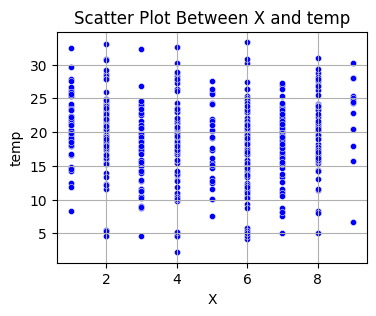

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def scatterPlot(df, x_axis, y_axis):
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=x_axis, y=y_axis, data=df, color='b', marker='o', s=20)
    plt.title(f'Scatter Plot Between {x_axis} and {y_axis}')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.grid(True)
    plt.show()
    
def linePlot(df, x_axis, y_axis):
    plt.figure(figsize=(4, 3))
    sns.lineplot(x=x_axis, y=y_axis, data=df, color='b', marker='o', linewidth=2, markersize=4)
    plt.title(f'Line Plot Between {x_axis} and {y_axis}')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.grid(True)
    plt.show()
    
scatterPlot(df, 'X', 'temp')

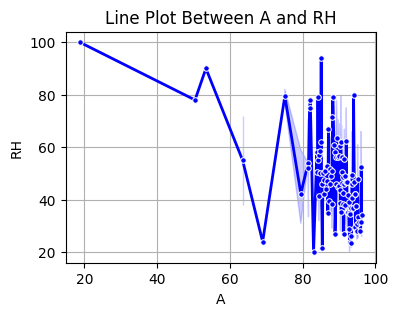

In [9]:
linePlot(df, 'A', 'RH')

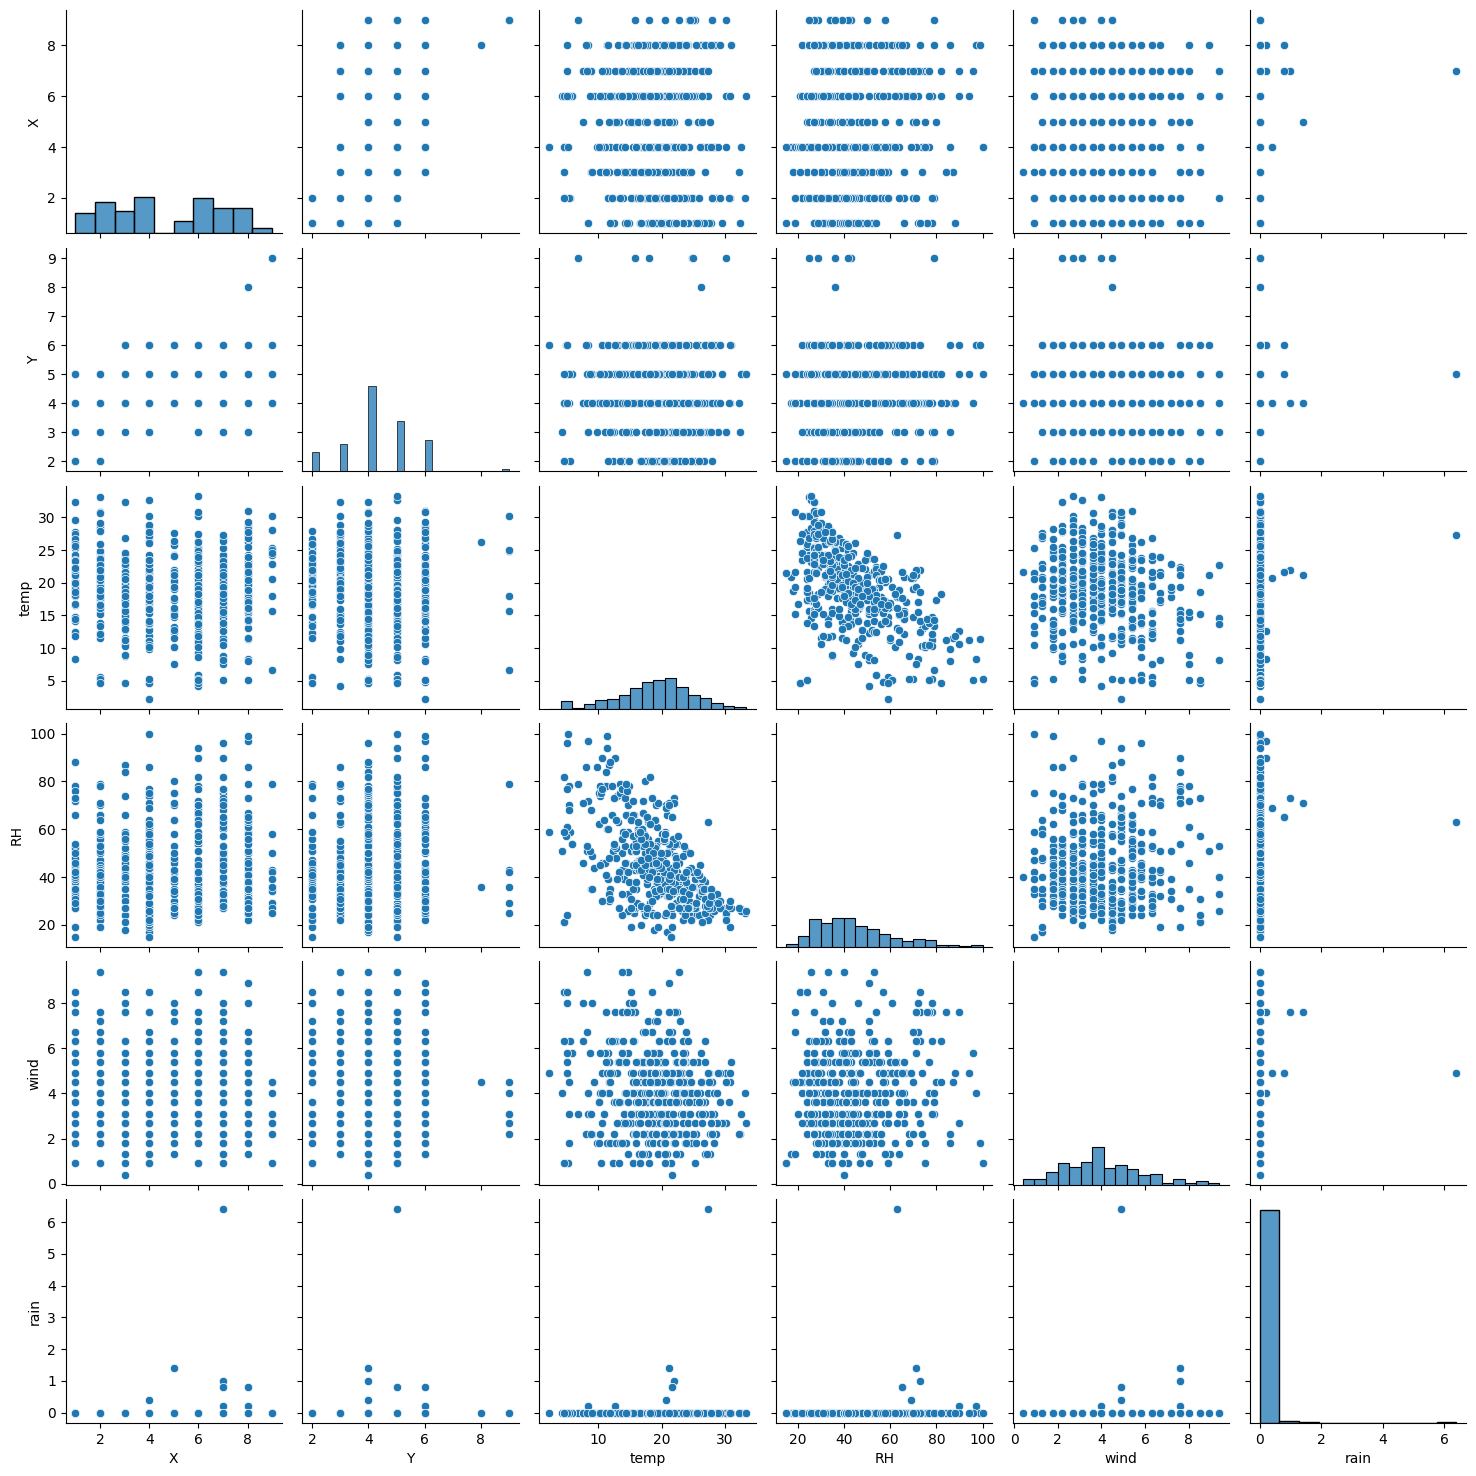

In [10]:
columns_selected = ['X', 'Y', 'temp', 'RH', 'wind', 'rain']
sns.pairplot(df[columns_selected])
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# creating features(X) and target variable(y) and splitting the data into training and testing sets 
X = df.drop(['area'], axis=1) 
y = df['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)

X_train = StandardScaler().fit(X_train).transform(X_train)
X_test = StandardScaler().fit(X_test).transform(X_test)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predicting new values & Running Evaluation Metrics
predictions = multi_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  -5.477555862161505e+23
The rmse is:  19157815343199.47


c:\Virtual_Envs\MLVenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
filt_df = df[df['area']>0]
print(df.shape)
filt_df.shape

(503, 30)


(267, 30)

In [13]:
'''
creating a function to create a new column "assign_area_new" in the DataFrame such that 
assign_new_area has binary values which was derived from the "area" column of the DataFrame
'''

def assign_area_new(area_value):
    if area_value > 0:
        return 1
    else:
        return 0
    
df['area_new'] = df['area'].apply(assign_area_new)
df

,X,Y,A,B,C,D,temp,RH,wind,rain,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,area_new
0,7,5.0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,...,False,False,True,False,False,False,False,False,False,0
1,7,4.0,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,...,True,False,False,False,False,False,False,True,False,0
2,7,4.0,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,...,True,False,False,False,True,False,False,False,False,0
3,8,6.0,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,...,False,False,True,False,False,False,False,False,False,0
4,8,6.0,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,...,False,False,False,False,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3.0,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,...,False,False,False,False,False,True,False,False,False,1
513,2,4.0,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,...,False,False,False,False,False,True,False,False,False,1
514,7,4.0,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,...,False,False,False,False,False,True,False,False,False,1
515,1,4.0,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,...,False,False,False,False,True,False,False,False,False,0


Logistic Regression

In [14]:
X = df.drop(['area','area_new'], axis=1)
y = df['area_new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5, shuffle=True)

X_train = StandardScaler().fit(X_train).transform(X_train)
X_test = StandardScaler().fit(X_test).transform(X_test)

from sklearn.linear_model import LogisticRegression as sk_LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

model=sk_LogisticRegression()
fit = model.fit(X_train, y_train)

y_test_prob = fit.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
auroc = roc_auc_score(y_test, y_test_prob)
auroc

0.6237373737373737

In [15]:
y_train_pred = fit.predict(X_train)
y_test_pred = fit.predict(X_test)

# threshold probabilities
y_train_pred = (y_train_pred > 0.5).astype(int)
y_test_pred = (y_test_pred > 0.5).astype(int)

acc_train = sum(y_train_pred==y_train)/len(y_train)
acc_test = sum(y_test_pred==y_test)/len(y_test)
print(f"train accuracy: {acc_train:.3f}; test accuracy: {acc_test:.3f}")

train accuracy: 0.588; test accuracy: 0.576


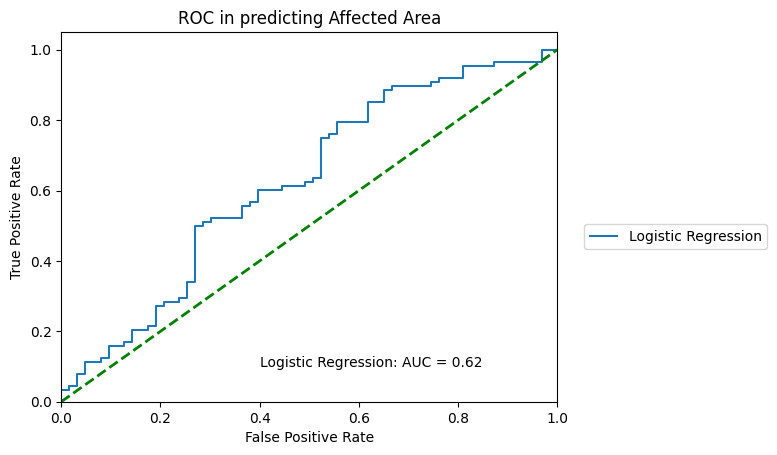

In [16]:
plt.plot(fpr, tpr,label="Logistic Regression")
plt.text(0.4, 0.1, "Logistic Regression" + ': AUC = '+ str(round(auroc,2)))
    

plt.plot([0, 1], [0, 1], color="g", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC in predicting Affected Area')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="upper left")

KNeighbors Regression

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(['area'], axis=1)
y = df['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

predictions = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 11898.292582172182
R-squared: -0.0039609483574467585
